In [52]:
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-pastel')
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
bins =(2, 6.5, 8) #2 bins, spread 6.5 (6.5 and up), from 0 to 8
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [9]:
label_quality = LabelEncoder()

In [10]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [12]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

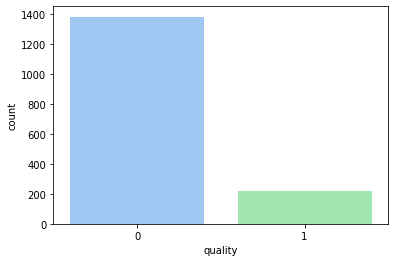

In [19]:
sns.countplot(wine['quality'])

In [20]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train[:10]

# Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [31]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc)) #how many predictedcorrect vs how many predicted wrong

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


# SVM Classifier

In [32]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [34]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf)) #how many predictedcorrect vs how many predicted wrong  

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# Neural Network

In [50]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 500) #3 hidden layers of 11 neurons each because we have 11 feature, going trough the data 500 times
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/Users/filippoteodoro/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [49]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc)) #how many predictedcorrect vs how many predicted wrong  

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       273
           1       0.49      0.55      0.52        47

    accuracy                           0.85       320
   macro avg       0.71      0.73      0.72       320
weighted avg       0.86      0.85      0.85       320

[[246  27]
 [ 21  26]]


In [67]:
from sklearn.metrics import accuracy_score
results = pd.DataFrame(columns = ['Random Forest', 'SVM Classifier', 'Neural Networks'])

rf = accuracy_score(y_test, pred_rfc)
svm = accuracy_score(y_test, pred_clf)
nn = accuracy_score(y_test, pred_mlpc)

results.loc[1] = [rf, svm, nn]
results


,Random Forest,SVM Classifier,Neural Networks
1,0.896875,0.875,0.878125


In [54]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [71]:
Xnew = [[7.3, 0.58, 0.1, 1.5, 0.075, 18.0, 38, 0.997, 3.82, 0.49, 8.2]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])